# 1. QR and least squares

In [59]:
using LinearAlgebra, Plots

m,n = 20,5
A = randn(m,n)
b = randn(m)

# find x that minimizes norm(A*x - b)
# inbuilt way:

x = A \ b

5-element Vector{Float64}:
 -0.03740796661710464
 -0.1887889397934601
 -0.03450786167316087
  0.023345465884136326
  0.1032321685701008

In [61]:
norm(A*x - b)

3.852852062860677

In [64]:
norm(A*(x .+ 0.01.*randn.()) - b) # perturbations have bigger norm

3.853049592209137

In [73]:
Q,R̂ = qr(A)
Q̂ = Q[:,1:n]

norm(Q̂*R̂ - A)

2.8628151562587506e-15

In [77]:
norm(R̂ \ Q̂'b - x)

8.15873481018251e-17

# 2. Quadratic fit

Approximate data by
$$
p(x) = p_0 + p_1 x + p_2 x^2
$$

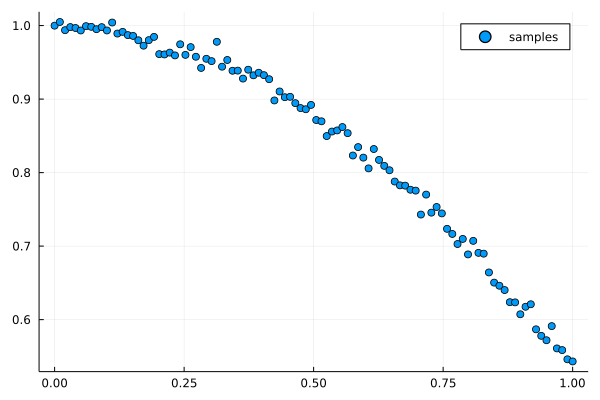

In [80]:
m,n = 100,3

x = range(0,1; length=100)
f = cos.(x) .+ 0.01 .* randn.()

scatter(x, f; label="samples")

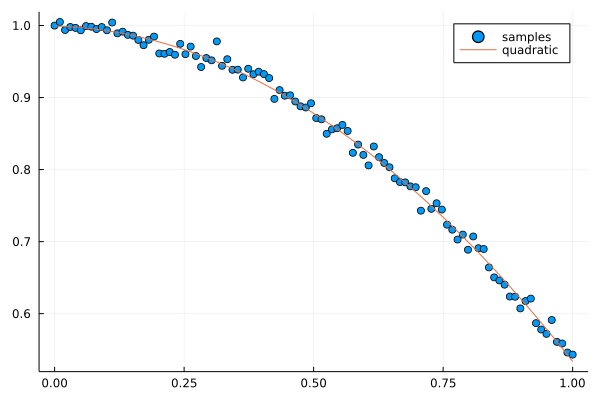

In [89]:
# p.(x) == p₀ .+ x*p₁ .+ x.^2*p₂ == 
# [ones(m) x x.^2] * [p₀, p₁, p₂] == 
# x .^ (0:2)' * [p₀, p₁, p₂]

A = x .^ (0:2)'
p₀, p₁, p₂ = A \ f
p = x -> p₀ + p₁*x + p₂*x^2


scatter(x, f; label="samples")
plot!(x, p.(x); label="quadratic")

100-element Vector{Float64}:
 0.0
 0.010101010101010102
 0.020202020202020204
 0.030303030303030304
 0.04040404040404041
 0.050505050505050504
 0.06060606060606061
 0.0707070707070707
 0.08080808080808081
 0.09090909090909091
 0.10101010101010101
 0.1111111111111111
 0.12121212121212122
 ⋮
 0.8888888888888888
 0.898989898989899
 0.9090909090909091
 0.9191919191919192
 0.9292929292929293
 0.9393939393939394
 0.9494949494949495
 0.9595959595959596
 0.9696969696969697
 0.9797979797979798
 0.98989898989899
 1.0